$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 6: Neural Networks

Shashank Satyanarayana

## Overview

For this assigment, we will write and apply code that trains neural networks of various numbers of hidden layers and units in each hidden layer and returns results as specified below. This process will be repeated once for a regression problem and once for a classification problem. 

## Required Code

For this assignment, we will be using the Artificial Neural Network Packages developed by Prof.Chuck Anderson for the CSU CS 440. The following are the contents from the package, which was downloaded from [nn2.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/nn2.tar) 

* `neuralnetworks.py`
* `scaledconjugategradient.py`
* `mlutils.py`

The following are the functions that train and evaluate neural network models.

* `results = trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify)`

The arguments to `trainNNs` are

* `X` is a matrix of input data of shape `nSamples x nFeatures`
* `T` is a matrix of target data of shape `nSamples x nOutputs`
* `trainFraction` is fraction of samples to use as training data. 1-`trainFraction` is number of samples for testing data
* `hiddenLayerStructures` is list of network architectures. For example, to test two networks, one with one hidden layer of 20 units, and one with 3 hidden layers with 5, 10, and 20 units in each layer, this argument would be `[[20], [5, 10, 20]]`.
* `numberRepetitions` is number of times to train a neural network.  Calculate training and testing average performance (two separate averages) of this many training runs.
* `numberIterations` is the number of iterations to run the scaled conjugate gradient algorithm when a neural network is trained.
* `classify` is set to `True` if you are doing a classification problem, in which case `T` must be a single column of target class integers.

This function returns `results` which is list with one element for each network structure tested.  Each element is a list containing 

* the hidden layer structure (as a list),
* a list of training data performance for each repetition, 
* a list of testing data performance for each repetition, and
* the number of seconds it took to run this many repetitions for this network structure.

Additionally, the following two functions are used to summarize and indicate the best network for any given test.

`summarize(results)` returns a list of lists like `results` but with the list of training performances replaced by their mean and the list of testing performances replaced by their mean.   
`bestNetwork(summary)` takes the output of `summarize(results)` and returns the best element of `results`, determined by the element that has the smallest test performance.

* `summary = summarize(results)` where `results` is returned by `trainNNs` and `summary` is like `results` with the training and testing performance lists replaced by their means
* `best = bestNetwork(summary)` where `summary` is returned by `summarize` and `best` is the best element of `summary`

## Examples


In [1]:
import numpy as np
import neuralnetworks as nn
import mlutils as ml
import time
import csv
import csv

In [2]:
X = np.arange(10).reshape((-1,1))
T = X + 1 + np.random.uniform(-1, 1, ((10,1)))


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

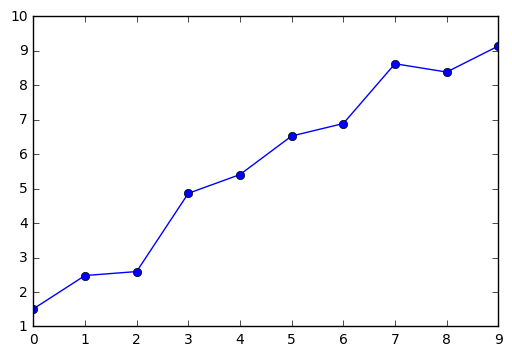

In [4]:
plt.plot(X, T, 'o-');

In [5]:
nnet = nn.NeuralNetwork(X.shape[1], 2, T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([ 0.70710678,  0.14872973,  0.10493926,  0.10273445,  0.10258959,
        0.10003049,  0.09983252,  0.09936436,  0.09936117,  0.09935844,
        0.09933465,  0.09932584,  0.0993081 ,  0.09930747,  0.09930722,
        0.09930698,  0.09930649,  0.09929534,  0.09929212,  0.09925891,
        0.09925127,  0.09924968,  0.09924729,  0.09924518,  0.09921933,
        0.09921504,  0.09920035,  0.09919947,  0.09919873,  0.09919804,
        0.09919742,  0.09919147,  0.09919147,  0.09919147,  0.09919147,
        0.09919147,  0.09919147,  0.09919147,  0.09919147,  0.09919147,
        0.09919147,  0.09919147,  0.09919147,  0.09919147,  0.09919147,
        0.09919147,  0.09919147,  0.09919147,  0.09919147,  0.09919147,
        0.09919147,  0.09919147,  0.0991232 ,  0.0991142 ,  0.09904083,
        0.09900861,  0.09899343,  0.09895741,  0.09895561,  0.09894001,
        0.09890282,  0.09889669,  0.09883223,  0.09878294,  0.098659  ,
        0.09859973,  0.09859151,  0.09854684,  0.09854059,  0.09

In [6]:
nnet = nn.NeuralNetwork(X.shape[1], [5, 5, 5], T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([ 0.70710678,  0.28450133,  0.17073094,  0.13211199,  0.12220505,
        0.11973018,  0.10965409,  0.10444109,  0.10426615,  0.10405626,
        0.10351595,  0.10298181,  0.10266697,  0.10153255,  0.10088406,
        0.10009474,  0.09976142,  0.09925829,  0.09891887,  0.09868466,
        0.09853964,  0.09853279,  0.09852121,  0.09849696,  0.09846992,
        0.09845616,  0.09844337,  0.09815513,  0.09811702,  0.09807627,
        0.0979805 ,  0.09796754,  0.09796206,  0.09794285,  0.0976747 ,
        0.09763911,  0.09756118,  0.0973416 ,  0.097338  ,  0.09731182,
        0.09727325,  0.09725867,  0.09674445,  0.09658771,  0.09656874,
        0.09655276,  0.09654455,  0.09654455,  0.09654455,  0.09654455,
        0.0957702 ,  0.09571463,  0.09458971,  0.0943475 ,  0.09414512,
        0.09372377,  0.09370198,  0.09366268,  0.09358032,  0.09353795,
        0.09339395,  0.0933811 ,  0.0933542 ,  0.09333766,  0.09331661,
        0.09329765,  0.09326959,  0.09322585,  0.09315112,  0.09

In [7]:
def trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify=False):
    result=[]
    rmsetrain=[]
    rmsetest=[]
    for c in range (0,len(hiddenLayerStructures)):
        StartTime=time.time()
        for n in range (0,numberRepetitions):
            ##Data Partition
            Xtrain, Ttrain, Xtest, Ttest = ml.partition(X,T,(trainFraction, 1-trainFraction), classify)
    
            #Create Neural Network
            if classify == True:
                nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1],hiddenLayerStructures[c],len(np.unique(Ttrain)))
            else:
                nnet = nn.NeuralNetwork(Xtrain.shape[1],hiddenLayerStructures[c],Ttrain.shape[1])
           
            #Train for numberIterations
            nnet.train(Xtrain, Ttrain, numberIterations, verbose=False)
            
            #Testing
            Ptrain = nnet.use(Xtrain)
            Ptest = nnet.use(Xtest)
           
            #Classification
            if classify == True:
                rmsetrain.append(1-((np.sum(Ptrain==Ttrain))/len(Ttrain)))
                rmsetest.append(1-((np.sum(Ptest==Ttest))/len(Ttest)))
                #print('Percent Correct: Training',100*np.sum(Ptrain==Ttrain)/len(Ttrain), 'Testing',100*np.sum(Ptest==Ttest)/len(Ttest))
            if classify == False:
                rmsetrain.append(np.sqrt(np.mean((Ptrain-Ttrain)**2)))
                rmsetest.append(np.sqrt(np.mean((Ptest-Ttest)**2)))
        EndTime=time.time()
        t=EndTime-StartTime
        r = [hiddenLayerStructures[c],rmsetrain,rmsetest,t]
        result.append(r)
        rmsetrain=[]
        rmsetest=[]
    return result

In [8]:
def summarize(results):
    Sresults=results
    for i in range (0,len(Sresults)):
        for j in range (1,4):
            Sresults[i][j]=np.mean(Sresults[i][j])
    return Sresults

In [9]:
def bestNetwork(results):
    least=results[0][2]
    best=results[0]
    for i in range (0, len(results)):
        if results[i][2]<least :
            least = results[i][2]
            best=results[i]
    return best

In [10]:
results = trainNNs(X, T, 0.8, [2, 10, [10, 10]], 5, 100, classify=False)
results

[[2,
  [0.34986036594491382,
   0.2684335586598201,
   0.26247686518284774,
   0.25360740339733445,
   0.35111834404984826],
  [0.54310915945982929,
   4.2038045638183066,
   0.68201638754532223,
   0.6831889409970775,
   0.53910516212884396],
  0.40780067443847656],
 [10,
  [0.32874394353177905,
   0.28395954756867248,
   0.24887862346731726,
   0.31291958988936064,
   0.11571866101494058],
  [0.54508576506780648,
   0.70143456889460543,
   0.83071133056377644,
   0.85872485646618768,
   1.192329202212203],
  0.2604546546936035],
 [[10, 10],
  [0.39869758677312073,
   0.33964882580314548,
   0.13383629145184908,
   0.15034900159338047,
   0.27519174563021825],
  [0.23776626298698375,
   0.66718270418048309,
   1.1240013934615336,
   1.0901383831854736,
   0.82446089945289114],
  0.18589448928833008]]

In [11]:
results = trainNNs(X, T, 0.8, [0, 1, 2, 10, [10, 10], [5, 5, 5, 5], [2]*5], 50, 400, classify=False)

In [12]:
summarize(results)

[[0, 0.45575085330470388, 0.54837904785433955, 0.061100482940673828],
 [1, 0.34173961493216176, 0.53258440724127543, 1.997314453125],
 [2, 0.24468613444262302, 1.3090842566050531, 6.8448104858398438],
 [10, 0.015402341660363686, 1.596877741232916, 4.2749922275543213],
 [[10, 10], 0.017212699991791203, 1.2921256114592186, 6.7068803310394287],
 [[5, 5, 5, 5], 0.097794587169342931, 1.5389433874242187, 11.520497560501099],
 [[2, 2, 2, 2, 2],
  0.23873681294711718,
  0.93078089018702448,
  10.570698022842407]]

In [13]:
best = bestNetwork(summarize(results))
print(best)
print('Hidden Layers {} Average RMSE Training {:.2f} Testing {:.2f} Took {:.2f} seconds'.format(*best))

[1, 0.34173961493216176, 0.53258440724127543, 1.997314453125]
Hidden Layers 1 Average RMSE Training 0.34 Testing 0.53 Took 2.00 seconds


Hummm...neural nets with no hidden layers did best on this simple data set.  Why?  Remember what "best" means.

`Answer:` "Best" implies the network with the least RMSE for test data

## Data for Regression Experiment

From the UCI Machine Learning Repository, download the [Appliances energy prediction](http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) data.  You can do this by visiting the Data Folder for this data set, or just do this:

     !wget http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv



Read this data into python.  One suggestion is to use the `loadtxt` function in the `numpy` package.  You may ignore the first column of each row which contains a data and time.  Also ignore the last two columns of random variables.  We will not use that in our modeling of this data.  You will also have to deal with the double quotes that surround every value in every field.  Read the first line of this file to get the names of the features.

Once you have read this in correctly, you should see values like this:

!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

In [14]:
def loadData(filename):
    f = open(filename,"r")
    header = f.readline()
    names = header.replace('"','').split(',')[1:27]
    data = np.array(list(csv.reader(f)))
    data=data[:(data.shape[0]),1:(data.shape[1]-2)]
    Xenergy=data[:,2:].astype(float)
    Xnames =header.replace('"','').split(',')[3:27]
    Tenergy=data[:,:2].astype(float)
    Tnames = header.replace('"','').split(',')[1:3]
    data=data.astype(np.float)
    return names,data, Xenergy, Xnames, Tenergy, Tnames

In [15]:
names,data,Xenergy,Xnames,Tenergy,Tnames=loadData('energydata_complete.csv')

In [16]:
names

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [17]:
data.shape

(19735, 26)

In [18]:
data[:2,:]

array([[  60.        ,   30.        ,   19.89      ,   47.59666667,
          19.2       ,   44.79      ,   19.79      ,   44.73      ,
          19.        ,   45.56666667,   17.16666667,   55.2       ,
           7.02666667,   84.25666667,   17.2       ,   41.62666667,
          18.2       ,   48.9       ,   17.03333333,   45.53      ,
           6.6       ,  733.5       ,   92.        ,    7.        ,
          63.        ,    5.3       ],
       [  60.        ,   30.        ,   19.89      ,   46.69333333,
          19.2       ,   44.7225    ,   19.79      ,   44.79      ,
          19.        ,   45.9925    ,   17.16666667,   55.2       ,
           6.83333333,   84.06333333,   17.2       ,   41.56      ,
          18.2       ,   48.86333333,   17.06666667,   45.56      ,
           6.48333333,  733.6       ,   92.        ,    6.66666667,
          59.16666667,    5.2       ]])

In [19]:
Xenergy.shape, Tenergy.shape

((19735, 24), (19735, 2))

In [20]:
Xnames

['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [21]:
Tnames

['Appliances', 'lights']

### Test for Optimum Iterations

In this section , we subject a neural network with 5 layers for several iterations. We then plot the error trace (nnet.getErrorTrace()) to decide the optimum number of iterations for this dataset. 
From the experiments below, we can conclude that the network with 500 iterations has a low RMSE value and significantly large learning rates. **Hence, the Optimum Number of Iterations for this Dataset is 500**

**Note:** Although the network with 1000 iterations has a better learning rate, due to the computational restrictions and insignificant amount of difference of RMSE we may choose the network with 500 iterations

Iterations: 100, RMSE for Data:64.58281438459335
Iterations: 200, RMSE for Data:65.11359938970234
Iterations: 500, RMSE for Data:63.778982190665964
Iterations: 1000, RMSE for Data:65.13173754747434


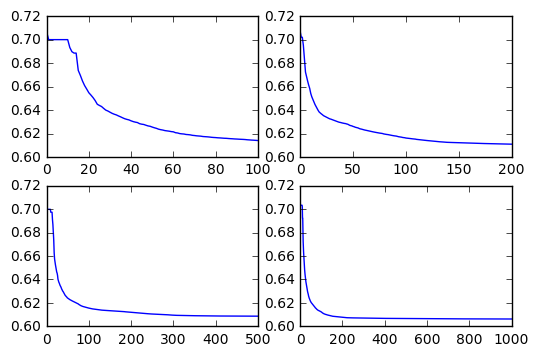

In [22]:
plt.subplot(2,2,1)
nnet = nn.NeuralNetwork(Xenergy.shape[1], [5], Tenergy.shape[1])
nnet.train(Xenergy, Tenergy, 100)
Pred = nnet.use(Xenergy)
print('Iterations: 100, RMSE for Data:{}'.format(np.sqrt(np.mean((Pred-Tenergy)**2))))
plt.plot(nnet.getErrorTrace())

plt.subplot(2,2,2)
nnet = nn.NeuralNetwork(Xenergy.shape[1], [5], Tenergy.shape[1])
nnet.train(Xenergy, Tenergy, 200)
Pred = nnet.use(Xenergy)
print('Iterations: 200, RMSE for Data:{}'.format(np.sqrt(np.mean((Pred-Tenergy)**2))))
plt.plot(nnet.getErrorTrace())

plt.subplot(2,2,3)
nnet = nn.NeuralNetwork(Xenergy.shape[1], [5], Tenergy.shape[1])
nnet.train(Xenergy, Tenergy, 500)
Pred = nnet.use(Xenergy)
print('Iterations: 500, RMSE for Data:{}'.format(np.sqrt(np.mean((Pred-Tenergy)**2))))
plt.plot(nnet.getErrorTrace())

plt.subplot(2,2,4)
nnet = nn.NeuralNetwork(Xenergy.shape[1], [5], Tenergy.shape[1])
nnet.train(Xenergy, Tenergy, 1000)
Pred = nnet.use(Xenergy)
print('Iterations: 1000, RMSE for Data:{}'.format(np.sqrt(np.mean((Pred-Tenergy)**2))))
plt.plot(nnet.getErrorTrace())

In [23]:
results = trainNNs(Xenergy, Tenergy, 0.8, [0, 5, [5, 5], [10, 10]], 10, 500)

In [24]:
summarize(results)

[[0, 67.16788464206941, 67.162847365560182, 3.6020774841308594],
 [5, 64.63519098933601, 65.948821557311618, 141.38886404037476],
 [[5, 5], 63.327366277949352, 65.132562202793821, 271.0431866645813],
 [[10, 10], 59.025445922788549, 63.445233897949983, 358.40345191955566]]

In [25]:
bestNetwork(summarize(results))

[[10, 10], 59.025445922788549, 63.445233897949983, 358.40345191955566]

### Test for Best Hidden Layer 

Test at least 10 different hidden layer structures.  Larger numbers of layers and units may do the best on training data, but not on testing data. Why?
`Answer`: Large networks may perform better on training data and not on testing data due the fact that the network is trained on the training data. Additionaly, we split the given data in a ratio of 80% Train to 20% Test. This leads to a fewer number of values in the test dataset. 

Now train another network with your best hidden layer structure on 0.8 of the data and use the trained network on the testing data (the remaining 0.2 of the date).  As before use `ml.partition` to produce the training and testing sets.

For the testing data, plot the predicted and actual `Appliances` energy use, and the predicted and actual `lights` energy use, in two separate plots.  Discuss what you see.

In [26]:
results = trainNNs(Xenergy, Tenergy, 0.8, [0, [1,1],[2,2],[3,3],[4,4],[5, 5],[6,6], [7,7], [8,8], [9,9], [10, 10]], 10, 100)
print(summarize(results))
bestHiddenLayer=bestNetwork(summarize(results))[0]

[[0, 66.880070177455508, 68.282088621297063, 3.6902458667755127], [[1, 1], 70.367517710281362, 70.70481364742912, 14.568342685699463], [[2, 2], 66.236559235908985, 67.63525185759363, 25.789113759994507], [[3, 3], 65.477346640208822, 66.960468378640527, 33.751856803894043], [[4, 4], 65.565511634274742, 65.521599008990592, 38.048393249511719], [[5, 5], 64.990822847956153, 64.824080746479055, 43.859411001205444], [[6, 6], 64.055676698383678, 66.068836400981908, 49.452681541442871], [[7, 7], 63.965060377813487, 64.027687786811811, 54.964142799377441], [[8, 8], 63.4448605537033, 65.339676773728385, 54.409460783004761], [[9, 9], 63.408640268536338, 64.174266959003091, 60.830657958984375], [[10, 10], 63.10196723389339, 64.649303995064997, 66.033128023147583]]


In [27]:
print('Best Hidden Layer Network is:', bestHiddenLayer, 'and it will be trained using 500 Iterations')

Best Hidden Layer Network is: [7, 7] and it will be trained using 500 Iterations


Hidden Layers [7, 7] Average RMSE Training:  61.8158050672 Average RMSE Testing: 66.3376953952


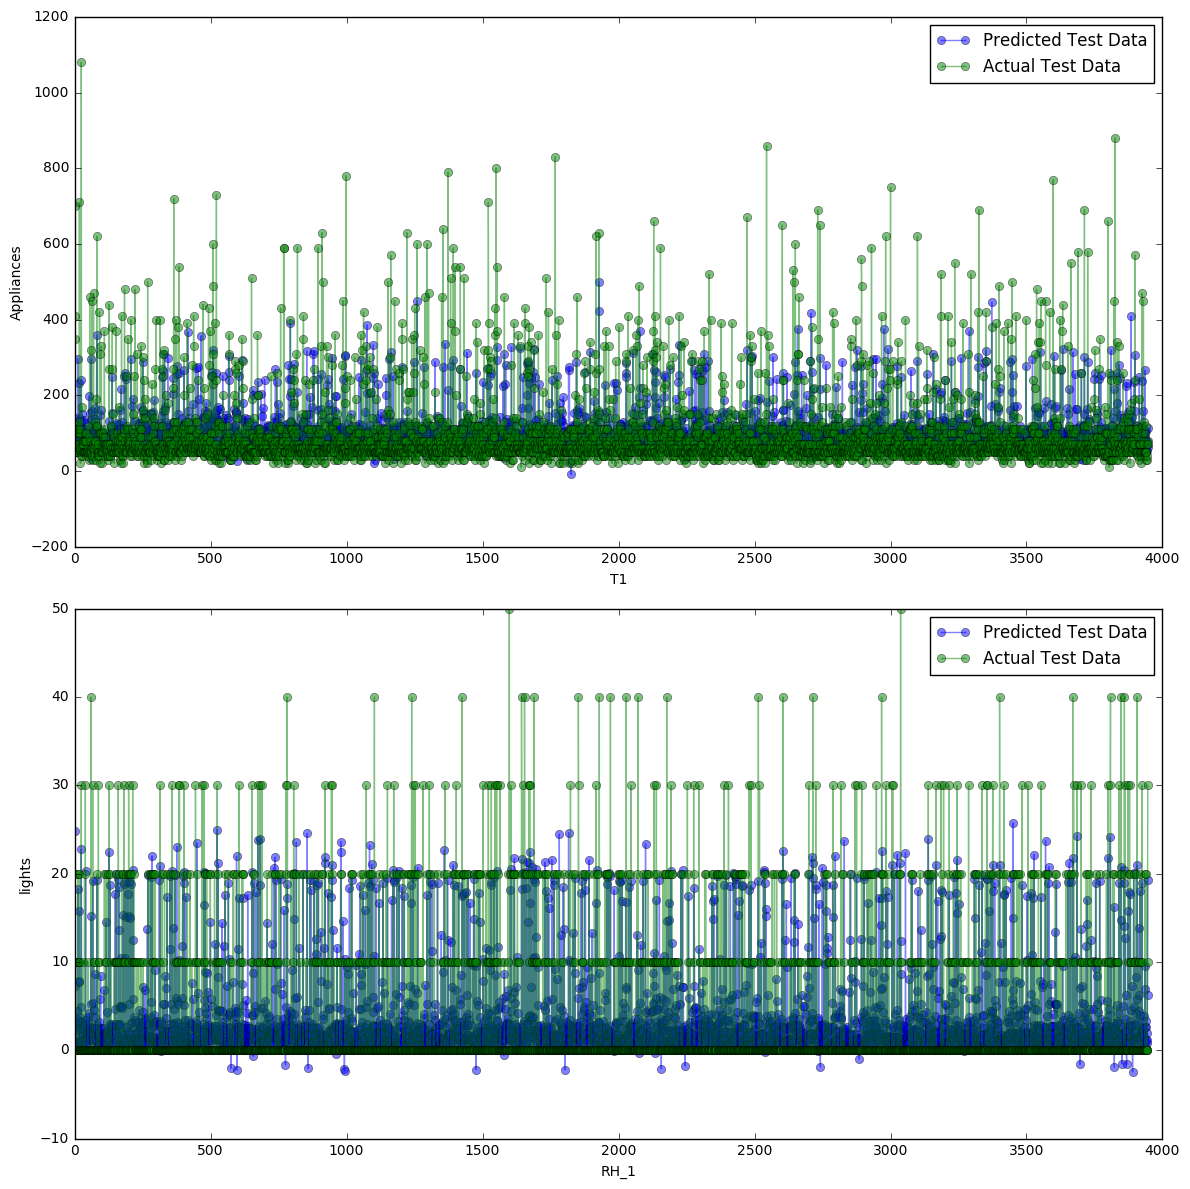

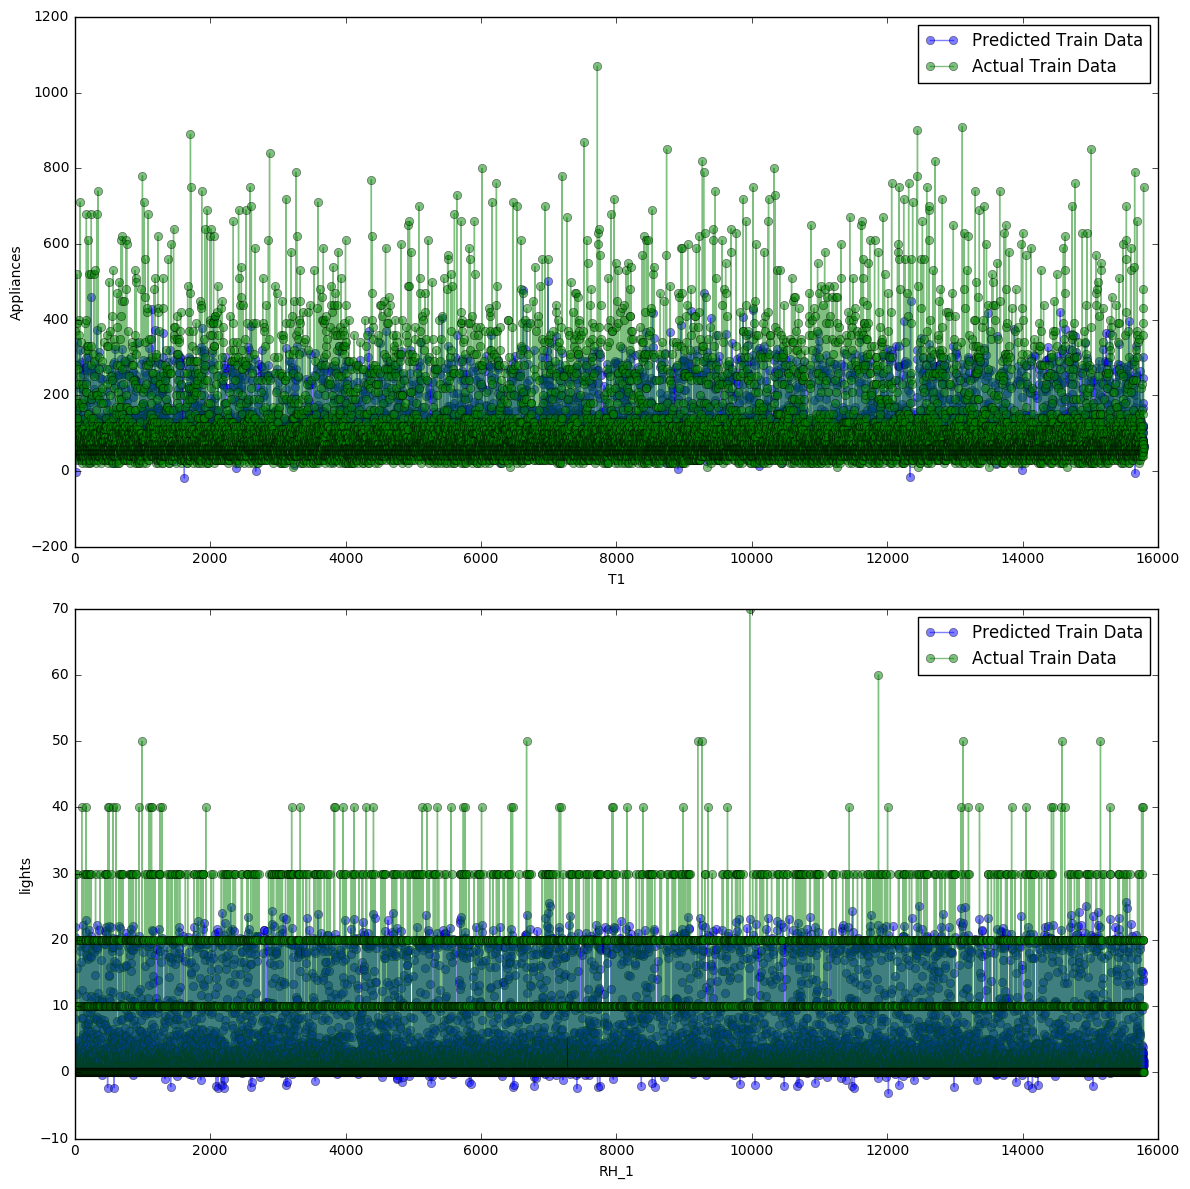

In [28]:
# Data Partition
Xtrain, Ttrain, Xtest, Ttest = ml.partition(Xenergy,Tenergy,(0.8, 0.2), classification=False)

#Create Neural Network
nnet = nn.NeuralNetwork(Xtrain.shape[1],bestHiddenLayer,Ttrain.shape[1])
           
#Train for numberIterations
nnet.train(Xtrain, Ttrain, 500, verbose=False)
            
#Testing
Ptrain = nnet.use(Xtrain)
Ptest = nnet.use(Xtest)

#Plotting
plt.figure(figsize=(12,12))
for c in range(Ttest.shape[1]):
    plt.subplot(2,1, c+1)        
    plt.plot(Ptest[:,c], '-o', alpha=0.5)
    plt.plot(Ttest[:,c], '-o', alpha=0.5)
    plt.ylabel(Tnames[c])
    plt.xlabel(Xnames[c])
    plt.legend(('Predicted Test Data','Actual Test Data'))
plt.tight_layout()

plt.figure(figsize=(12,12))
for c in range(Ptrain.shape[1]):
    plt.subplot(2,1, c+1)        
    plt.plot(Ptrain[:,c], '-o', alpha=0.5)
    plt.plot(Ttrain[:,c], '-o', alpha=0.5)
    plt.ylabel(Tnames[c])
    plt.xlabel(Xnames[c])
    plt.legend(('Predicted Train Data','Actual Train Data'))
plt.tight_layout()

print('Hidden Layers', bestHiddenLayer, 'Average RMSE Training: ', np.sqrt(np.mean((Ptrain-Ttrain)**2)) ,'Average RMSE Testing:',np.sqrt(np.mean((Ptest-Ttest)**2)))


### Results
The following conclusions can me made from the graphs above:
* From practical knowledge and experience, we know that the number of Applicance and Lights can never be less than zero(0). However, the predicted value of both the train and test data is less than zero at certain instances
* The Network suffer from High RMSE Train and Test values
* The average RMSE Train and test values obtained from the above experiment are significantly to the Confidence Interval of the datasets.


## Data for Classification Experiment

From the UCI Machine Learning Repository, download the [Anuran Calls (MFCCs)](http://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29) data.  You can do this by visiting the Data Folder for this data set, or just do this:

     !wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/00406/Anuran Calls (MFCCs).zip'
     !unzip Anuran*zip
     
Read the data in the file `Frogs_MFCCs.csv` into python.  This will be a little tricky. Each line of the file is a sample of audio features plus three columns that label the sample by family, genus, and species. We will try to predict the species.  The tricky part is that the species is given as text.  We need to convert this to a target class, as an integer. The `numpy` function `unique` will come in handy here.

!wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/00406/Anuran Calls (MFCCs).zip'
!unzip Anuran*zip

In [29]:
def loadClassificationData(filename):
    f = open(filename,"r")
    header = f.readline()
    names = header.strip().split(',')[1:27]
    data = np.array(list(csv.reader(f)))
    Xanuran=data[:,1:22].astype(np.float)
    classes=np.unique(data[:,24:25])
    Tanuran=[]
    for i in range (data.shape[0]):
        for j in range (10):
            if data[i,24:25] == classes[j]:
                 Tanuran.append([j])
    Tanuran=np.array(Tanuran)
    np.reshape(Tanuran,(data.shape[0],1))
    return names,data,Xanuran,Tanuran

In [30]:
names,data,Xanuran,Tanuran = loadClassificationData('Frogs_MFCCs.csv')

In [31]:
data.shape

(7195, 26)

In [32]:
Xanuran.shape, Tanuran.shape

((7195, 21), (7195, 1))

In [33]:
Xanuran[:2,:]

array([[ 0.1529363 , -0.1055859 ,  0.20072191,  0.31720106,  0.26076385,
         0.10094464, -0.1500626 , -0.17112763,  0.12467644,  0.18865415,
        -0.07562172, -0.15643593,  0.08224512,  0.13575204, -0.02401665,
        -0.10835111, -0.07762252, -0.0095678 ,  0.05768398,  0.11868014,
         0.01403845],
       [ 0.17153426, -0.09897474,  0.26842522,  0.33867186,  0.2683531 ,
         0.06083509, -0.22247464, -0.20769267,  0.17088287,  0.27095828,
        -0.09500394, -0.25434147,  0.02278623,  0.1633201 ,  0.01202228,
        -0.09097401, -0.05650952, -0.03530336,  0.02013996,  0.08226299,
         0.02905574]])

In [34]:
Tanuran[:2]

array([[0],
       [0]])

In [35]:
for i in range(10):
    print('{} samples in class {}'.format(np.sum(Tanuran==i), i))

672 samples in class 0
3478 samples in class 1
542 samples in class 2
310 samples in class 3
472 samples in class 4
1121 samples in class 5
270 samples in class 6
114 samples in class 7
68 samples in class 8
148 samples in class 9


### Test for Optimum Number of Iterations

In this section , we subject a neural network with 5 layers for several iterations. We then plot the error trace (nnet.getErrorTrace()) to decide the optimum number of iterations for this dataset. 
From the experiments below, we can conclude that the network with 500 iterations has a low RMSE value and significantly large learning rates. **Hence, the Optimum Number of Iterations for this Dataset is 500**

**Note:** Although the network with 1000 iterations has a better learning rate, due to the computational restrictions and insignificant amount of difference of RMSE we may choose the network with 500 iterations

Iterations: 100, RMSE for Data:0.031132731063238328
Iterations: 200, RMSE for Data:0.03335649756775538
Iterations: 500, RMSE for Data:0.029325920778318304
Iterations: 1000, RMSE for Data:0.024044475330090354


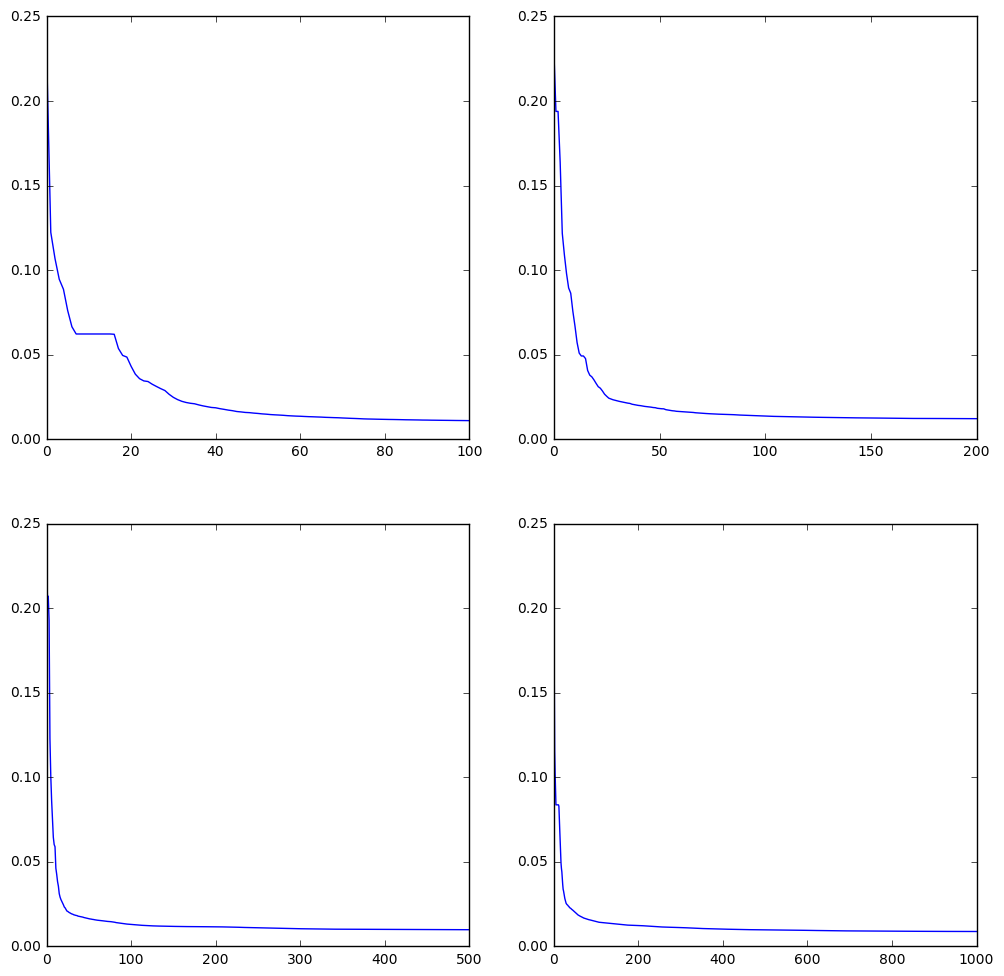

In [36]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
nnet = nn.NeuralNetworkClassifier(Xanuran.shape[1], [5], len(np.unique(Tanuran)))
nnet.train(Xanuran, Tanuran, 100)
Pred = nnet.use(Xanuran)
rmse = 1-((np.sum(Pred==Tanuran))/len(Tanuran))
print('Iterations: 100, RMSE for Data:{}'.format(rmse))
plt.plot(nnet.getErrorTrace())

plt.subplot(2,2,2)
nnet = nn.NeuralNetworkClassifier(Xanuran.shape[1], [5], len(np.unique(Tanuran)))
nnet.train(Xanuran, Tanuran, 200)
Pred = nnet.use(Xanuran)
rmse = 1-((np.sum(Pred==Tanuran))/len(Tanuran))
print('Iterations: 200, RMSE for Data:{}'.format(rmse))
plt.plot(nnet.getErrorTrace())

plt.subplot(2,2,3)
nnet = nn.NeuralNetworkClassifier(Xanuran.shape[1], [5], len(np.unique(Tanuran)))
nnet.train(Xanuran, Tanuran, 500)
Pred = nnet.use(Xanuran)
rmse = 1-((np.sum(Pred==Tanuran))/len(Tanuran))
print('Iterations: 500, RMSE for Data:{}'.format(rmse))
plt.plot(nnet.getErrorTrace())

plt.subplot(2,2,4)
nnet = nn.NeuralNetworkClassifier(Xanuran.shape[1], [5], len(np.unique(Tanuran)))
nnet.train(Xanuran, Tanuran, 1000)
Pred = nnet.use(Xanuran)
rmse = 1-((np.sum(Pred==Tanuran))/len(Tanuran))
print('Iterations: 1000, RMSE for Data:{}'.format(rmse))
plt.plot(nnet.getErrorTrace())

Experiments using 500 iterations

In [37]:
results = trainNNs(Xanuran, Tanuran, 0.8, [0, 5, [5, 5]], 5, 500, classify=True)

In [38]:
summarize(results)

[[0, 0.029673384294649052, 0.033356497567755383, 28.661578416824341],
 [5, 0.03731758165392636, 0.047116052814454454, 48.835700273513794],
 [[5, 5], 0.030820013898540676, 0.04572619874913135, 60.609310865402222]]

In [39]:
bestNetwork(summarize(results))

[0, 0.029673384294649052, 0.033356497567755383, 28.661578416824341]

### Test for Best Hidden Layer 

Now do an investigation like you did for the regression data. 

Test at least 10 different hidden layer structures. Then train another network with your best hidden layer structure on 0.8 of the data and use the trained network on the testing data (the remaining 0.2 of the date). 

Plot the predicted and actual `Species` for the testing data as an integer.  Discuss what you see.

In [40]:
results = trainNNs(Xanuran, Tanuran, 0.8, [0, [1,1],[2,2],[3,3],[4,4],[5, 5],[6,6], [7,7], [8,8], [9,9], [10, 10]], 10, 100)
print(summarize(results))
bestHiddenLayer=bestNetwork(summarize(results))[0]

[[0, 1.2198366135305454, 1.2173534274370699, 0.60724687576293945], [[1, 1], 1.0050734144479683, 1.0335047108350035, 4.7718026638031006], [[2, 2], 0.80592037585463383, 0.85347315553481362, 7.7364423274993896], [[3, 3], 0.64338239221448446, 0.70810628974175327, 9.6080613136291504], [[4, 4], 0.57722414620876816, 0.66055459152652818, 10.780896663665771], [[5, 5], 0.53742340363873442, 0.63728662952643433, 13.75168514251709], [[6, 6], 0.48279870158809646, 0.57437587807110679, 14.892840147018433], [[7, 7], 0.47563845380238839, 0.59343807369332957, 16.850965261459351], [[8, 8], 0.45797192797498421, 0.54626839060930965, 16.736429929733276], [[9, 9], 0.43856766021433724, 0.51923199259891972, 19.028544187545776], [[10, 10], 0.42406235300483675, 0.54292056001477085, 20.131900548934937]]


In [41]:
print('Best Hidden Layer Network is:', bestHiddenLayer, 'and it will be trained using 500 Iterations')

Best Hidden Layer Network is: [9, 9] and it will be trained using 500 Iterations


In [42]:
# Data Partition
Xtrain, Ttrain, Xtest, Ttest = ml.partition(Xanuran,Tanuran,(0.8, 0.2), classification=True)

#Create Neural Network
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1],bestHiddenLayer,len(np.unique(Ttrain)))
           
#Train for numberIterations
nnet.train(Xtrain, Ttrain, 500, verbose=False)
            
#Testing
Ptrain = nnet.use(Xtrain)
Ptest = nnet.use(Xtest)

classes = np.unique(Ttest)
Ptrain,Prtrain,_ = nnet.use(Xtrain,allOutputs=True)
Ptest,Prtest,_ = nnet.use(Xtest,allOutputs=True)

print('Percent Correct: Training',100*np.sum(Ptrain==Ttrain)/len(Ttrain))
print()
ml.confusionMatrix(Ttrain,Ptrain,classes)
print('0-AdenomeraAndre 1-AdenomeraHylaedactylus 2-Ameeregatrivittata 3-HylaMinuta 4-HypsiboasCinerascens 5-HypsiboasCordobae 6-LeptodactylusFuscus 7-OsteocephalusOophagus 8-Rhinellagranulosa 9-ScinaxRuber')
print()
print('Percent Correct: Testing',100*np.sum(Ptest==Ttest)/len(Ttest))
print()
ml.confusionMatrix(Ttest,Ptest,classes)
print('0-AdenomeraAndre 1-AdenomeraHylaedactylus 2-Ameeregatrivittata 3-HylaMinuta 4-HypsiboasCinerascens 5-HypsiboasCordobae 6-LeptodactylusFuscus 7-OsteocephalusOophagus 8-Rhinellagranulosa 9-ScinaxRuber')


Percent Correct: Training 100.0

       0    1    2    3    4    5    6    7    8    9
    ------------------------------------------------------------
 0 |100.0  0    0    0    0    0    0    0    0    0     (538 / 538)
 1 |  0  100.0  0    0    0    0    0    0    0    0     (2782 / 2782)
 2 |  0    0  100.0  0    0    0    0    0    0    0     (434 / 434)
 3 |  0    0    0  100.0  0    0    0    0    0    0     (248 / 248)
 4 |  0    0    0    0  100.0  0    0    0    0    0     (378 / 378)
 5 |  0    0    0    0    0  100.0  0    0    0    0     (897 / 897)
 6 |  0    0    0    0    0    0  100.0  0    0    0     (216 / 216)
 7 |  0    0    0    0    0    0    0  100.0  0    0     (91 / 91)
 8 |  0    0    0    0    0    0    0    0  100.0  0     (54 / 54)
 9 |  0    0    0    0    0    0    0    0    0  100.0   (118 / 118)
0-AdenomeraAndre 1-AdenomeraHylaedactylus 2-Ameeregatrivittata 3-HylaMinuta 4-HypsiboasCinerascens 5-HypsiboasCordobae 6-LeptodactylusFuscus 7-OsteocephalusOoph

### Result

The Confusion Matrix above explains the results. From the table we may conclude that most, if not all of the Species of the Frogs have been correctly classified. Additionally we may note that using the Classification Method for training a Network, we can achive significantly higher performance, better learning rates and better RMSE. 

## Grading

Download [A6grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A6grader.tar) and extract `A6grader.py` from it.

In [43]:
%run -i "A6grader.py"


Testing summarize([[[1,1], [1.2, 1.3, 1.4], [2.2, 2.3, 2.4], 0.5], [[2,2,2], [4.4, 4.3, 4.2], [6.5, 6.4, 6.3], 0.6]])

--- 10/10 points. Correctly returned [[[1, 1], 1.3, 2.3000000000000003, 0.5], [[2, 2, 2], 4.2999999999999998, 6.3999999999999995, 0.59999999999999998]]

Testing bestNetwork([[[1, 1], 1.3, 2.3, 0.5], [[2, 2, 2], 4.3, 1.3, 0.6]])

--- 10/10 points. Correctly returned [[2, 2, 2], 4.3, 1.3, 0.6]

X = np.random.uniform(-1, 1, (100, 3))
T = np.hstack(((X**2 - 0.2*X**3).sum(axis=1,keepdims=True),
               (np.sin(X)).sum(axis=1,keepdims=True)))
result = trainNNs(X, T, 0.7, [0, 5, 10, [20, 20]], 10, 100, False)

--- 20/20 points. Correct.

Testing bestNetwork(summarize(result))

--- 20/20 points. You correctly found that network [20, 20] is best.

Intro to AI Execution Grade is 60/60

======================= The regression data set =======================

--- _/5 points. Read the data in energydata_complete.csv into variables Xenergy and Tenergy.

--- _/5 points. Train

## Extra Credit

Repeat the above regression and classification experiments with a second regression data set and a second classification data set.

## Data for Regression Experiment



From the UCI Machine Learning Repository, we downloaded and used the [Geographical Origin of Music Data Set](http://archive.ics.uci.edu/ml/datasets/Geographical+Original+of+Music) data.  

* This data consists of the audio features of 1059 tracks. 
* The first 116 columns are audio features of the track, and the last two columns are the origin of the music. The origin of the music refers to the location data, which is limited in precision to the country of origin by latitude and longitude 

Using Linear Regression methods, we will use the 116 audio features to predict the origin of the music

Since the dataset did not have names, we will be manually assigning names here. The columns in Xmusic will be named as feature 1 to 116, the columns in Tmusic will be named as Latitude and Longitude respectively

In [44]:
def loadData(filename):
    f = open(filename,"r")
    data = np.array(list(csv.reader(f)))
    Xmusic=data[:,0:116].astype(np.float)
    Tmusic=data[:,115:117].astype(np.float)
    return data, Xmusic, Tmusic

In [45]:
data, Xmusic, Tmusic= loadData('default_plus_chromatic_features_1059_tracks.txt')

In [46]:
data.shape

(1059, 118)

In [47]:
Xmusic.shape, Tmusic.shape

((1059, 116), (1059, 2))

### Test for Optimum Iterations

In this section , we subject a neural network with 5 layers for several iterations. We then plot the error trace (nnet.getErrorTrace()) to decide the optimum number of iterations for this dataset. From the experiments below, we can conclude that the network with 2000 iterations has a low RMSE value and significantly large learning rates. Hence, the **Optimum Number of Iterations for this Dataset is 2000**. Additionaly considering the small size of the dataset, it would be ideal to have higher number of iterations and thus achieve a lower RMSE and better learning rate. 

Iterations: 100, RMSE for Data:10.022684772215358
Iterations: 200, RMSE for Data:9.15351459548644
Iterations: 500, RMSE for Data:7.951551536357732
Iterations: 2000, RMSE for Data:7.476575003685397


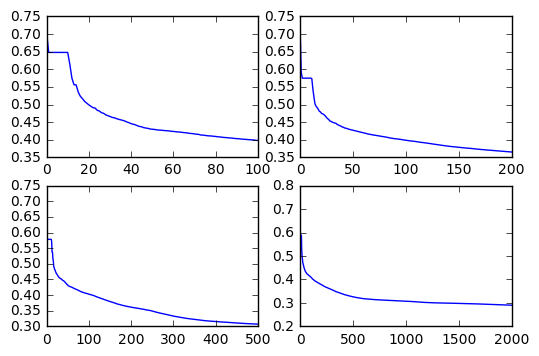

In [48]:
plt.subplot(2,2,1)
nnet = nn.NeuralNetwork(Xmusic.shape[1], [5], Tmusic.shape[1])
nnet.train(Xmusic, Tmusic, 100)
Pred = nnet.use(Xmusic)
print('Iterations: 100, RMSE for Data:{}'.format(np.sqrt(np.mean((Pred-Tmusic)**2))))
plt.plot(nnet.getErrorTrace())

plt.subplot(2,2,2)
nnet = nn.NeuralNetwork(Xmusic.shape[1], [5], Tmusic.shape[1])
nnet.train(Xmusic, Tmusic, 200)
Pred = nnet.use(Xmusic)
print('Iterations: 200, RMSE for Data:{}'.format(np.sqrt(np.mean((Pred-Tmusic)**2))))
plt.plot(nnet.getErrorTrace())

plt.subplot(2,2,3)
nnet = nn.NeuralNetwork(Xmusic.shape[1], [5], Tmusic.shape[1])
nnet.train(Xmusic, Tmusic, 500)
Pred = nnet.use(Xmusic)
print('Iterations: 500, RMSE for Data:{}'.format(np.sqrt(np.mean((Pred-Tmusic)**2))))
plt.plot(nnet.getErrorTrace())

plt.subplot(2,2,4)
nnet = nn.NeuralNetwork(Xmusic.shape[1], [5], Tmusic.shape[1])
nnet.train(Xmusic, Tmusic, 2000)
Pred = nnet.use(Xmusic)
print('Iterations: 2000, RMSE for Data:{}'.format(np.sqrt(np.mean((Pred-Tmusic)**2))))
plt.plot(nnet.getErrorTrace())

In [49]:
results = trainNNs(Xmusic, Tmusic, 0.8, [0, 5, [5, 5], [10, 10]], 10, 2000)

In [50]:
summarize(results)

[[0, 10.888592162586487, 11.846743221595904, 1.3337447643280029],
 [5, 6.4766463145985131, 15.808236061903457, 82.472186088562012],
 [[5, 5], 5.4739178214836075, 17.944999742445539, 98.343140840530396],
 [[10, 10], 1.7889966902042542, 19.74009179204522, 139.26796436309814]]

In [51]:
bestNetwork(summarize(results))

[0, 10.888592162586487, 11.846743221595904, 1.3337447643280029]

### Test for Best Hidden Layer

In [52]:
results = trainNNs(Xmusic, Tmusic, 0.8, [0, [1,1],[2,2],[3,3],[4,4],[5, 5],[6,6], [7,7], [8,8], [9,9], [10, 10]], 10, 100)
print(summarize(results))
bestHiddenLayer=bestNetwork(summarize(results))[0]

[[0, 10.928438768997999, 11.830891998733192, 1.1433603763580322], [[1, 1], 12.998542896860181, 13.231605686869367, 2.1062986850738525], [[2, 2], 11.829579693986407, 12.183994695475853, 3.2299234867095947], [[3, 3], 10.412905712078347, 12.113783508154015, 3.9142553806304932], [[4, 4], 10.245859971185237, 11.917955605018498, 3.99432373046875], [[5, 5], 10.049359450799697, 12.052699400186063, 4.5219225883483887], [[6, 6], 9.6827197759339647, 12.372205630321174, 5.0827529430389404], [[7, 7], 9.5218787641763019, 11.751122909044035, 6.3271818161010742], [[8, 8], 9.2996649371828859, 12.165870911151124, 4.9721059799194336], [[9, 9], 9.1798239057229569, 12.203362741506893, 5.6668038368225098], [[10, 10], 8.801849990160159, 12.058886738746772, 5.8821630477905273]]


In [53]:
print('Best Hidden Layer Network is:', bestHiddenLayer, 'and it will be trained using 2000 Iterations')

Best Hidden Layer Network is: [7, 7] and it will be trained using 2000 Iterations


Hidden Layers [7, 7] Average RMSE Training:  3.56390582616 Average RMSE Testing: 20.1322820325


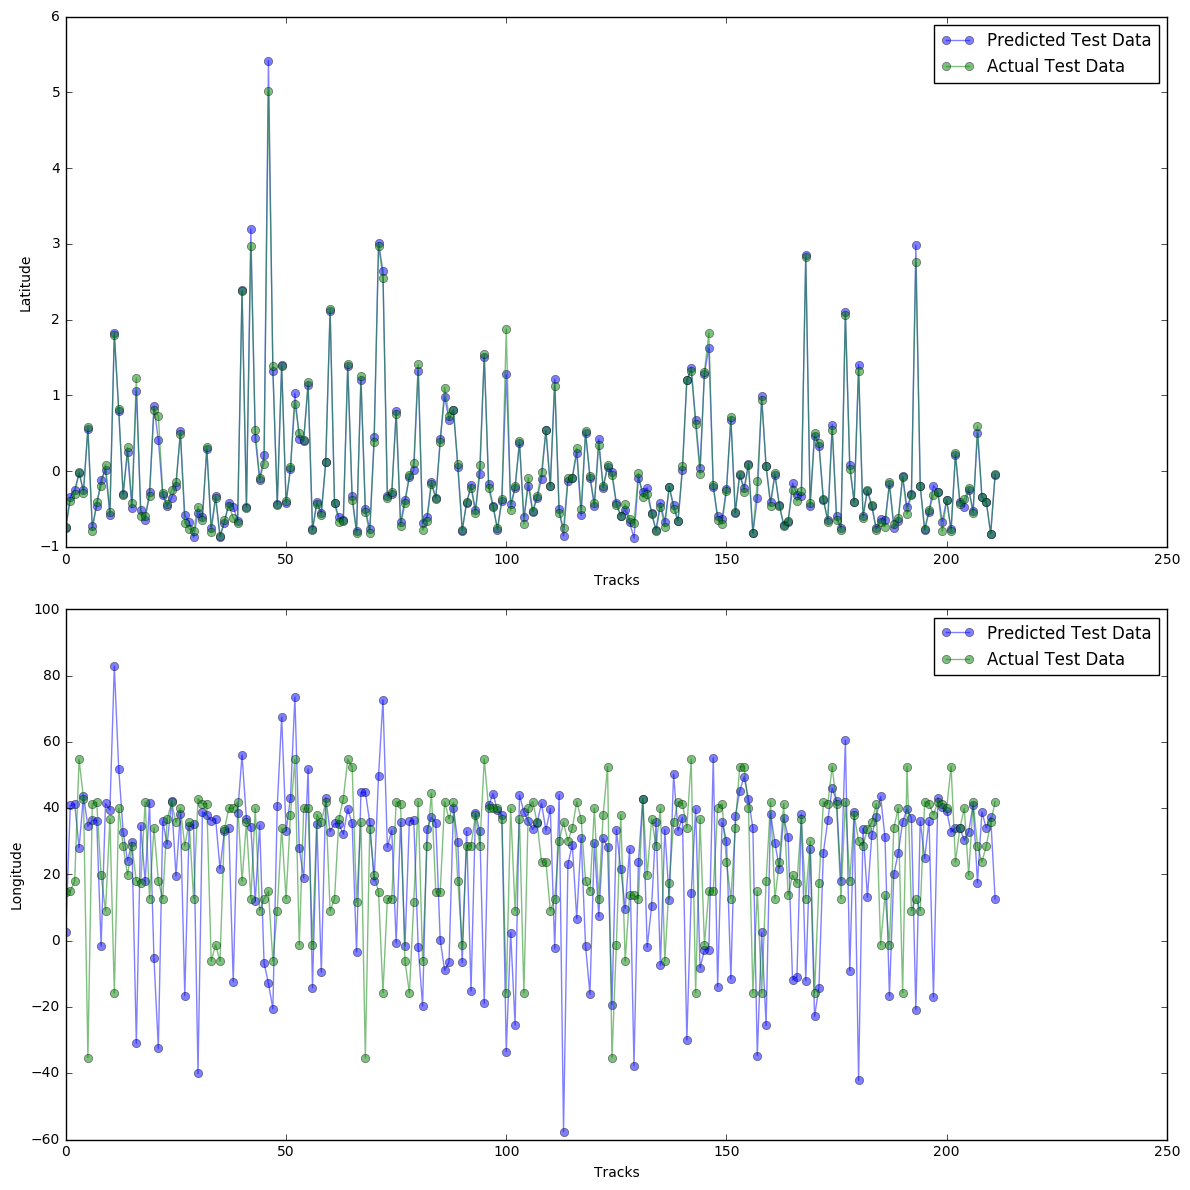

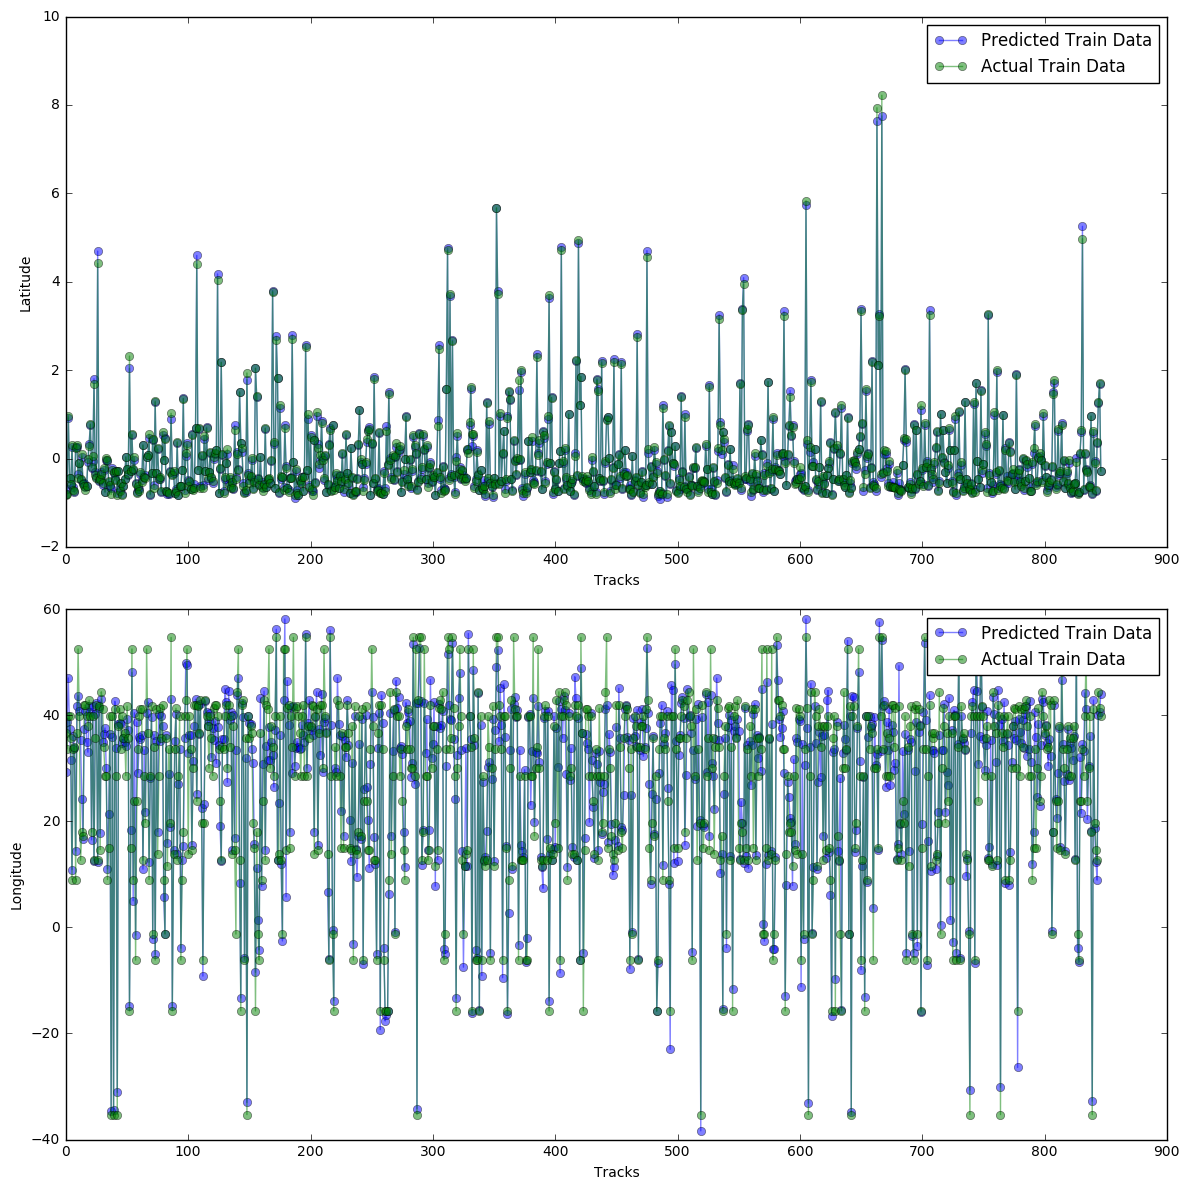

In [54]:
# Data Partition
Xtrain, Ttrain, Xtest, Ttest = ml.partition(Xmusic,Tmusic,(0.8, 0.2), classification=False)

#Create Neural Network
nnet = nn.NeuralNetwork(Xtrain.shape[1],bestHiddenLayer,Ttrain.shape[1])
           
#Train for numberIterations
nnet.train(Xtrain, Ttrain, 2000, verbose=False)
            
#Testing
Ptrain = nnet.use(Xtrain)
Ptest = nnet.use(Xtest)
Tnames=['Latitude','Longitude']
#Plotting
plt.figure(figsize=(12,12))
for c in range(Ttest.shape[1]):
    plt.subplot(2,1, c+1)        
    plt.plot(Ptest[:,c], '-o', alpha=0.5)
    plt.plot(Ttest[:,c], '-o', alpha=0.5)
    plt.ylabel(Tnames[c])
    plt.xlabel('Tracks')
    plt.legend(('Predicted Test Data','Actual Test Data'))
plt.tight_layout()

plt.figure(figsize=(12,12))
for c in range(Ptrain.shape[1]):
    plt.subplot(2,1, c+1)        
    plt.plot(Ptrain[:,c], '-o', alpha=0.5)
    plt.plot(Ttrain[:,c], '-o', alpha=0.5)
    plt.ylabel(Tnames[c])
    plt.xlabel('Tracks')
    plt.legend(('Predicted Train Data','Actual Train Data'))
plt.tight_layout()

print('Hidden Layers', bestHiddenLayer, 'Average RMSE Training: ', np.sqrt(np.mean((Ptrain-Ttrain)**2)) ,'Average RMSE Testing:',np.sqrt(np.mean((Ptest-Ttest)**2)))


## Data for Classification Experiment

From the UCI Machine Learning Repository, we downloaded the [Epileptic Seizure Recognition Data Set](http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition) data.  You can do this by visiting the Data Folder for this data set, or just do this:

     
This data consists of 178 features which represents a randomly selected 1-second long sample picked from the single file. Each file is a recording of brain activity for 23.6 seconds. The corresponding time-series is sampled into 4097 data points.

y contains the category of the 179-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}
The intgers in y represent the following conditions: 
* 5- eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open
* 4- eyes closed, means when they were recording the EEG signal the patient had their eyes closed
* 3- Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area
* 2- They recorder the EEG from the area where the tumor was located

All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure

* 1- Recording of seizure activity 

For this experiment, we will model the first 178 rows as the Input to a Classification Neural Network and predict the outcome of y in row 179

!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00388/data.csv

In [55]:
def loadClassificationData(filename):
    f = open(filename,"r")
    header = f.readline()
    names = header.strip().split(',')[1:]
    data = np.array(list(csv.reader(f)))
    Xepic=data[:,1:179].astype(np.float)
    classes=np.unique(data[:,179:180])
    Tepic=[]
    for i in range (data.shape[0]):
        for j in range (len(classes)):
            if data[i,179] == classes[j]:
                 Tepic.append([j])
    Tepic=np.array(Tepic)
    np.reshape(Tepic,(data.shape[0],1))
    return names,data, Xepic, Tepic

In [56]:
names, data, Xepic, Tepic= loadClassificationData('data.csv')

In [57]:
data.shape, Xepic.shape, Tepic.shape

((11500, 180), (11500, 178), (11500, 1))

In [58]:
for i in range(5):
    print('{} samples in class {}'.format(np.sum(Tepic==i), i))

2300 samples in class 0
2300 samples in class 1
2300 samples in class 2
2300 samples in class 3
2300 samples in class 4


### Test for Optimum Number of Iterations
In this section , we subject a neural network with 5 layers for several iterations. We then plot the error trace (nnet.getErrorTrace()) to decide the optimum number of iterations for this dataset. 
From the experiments below, we can conclude that the network with 500 iterations has the lowest RMSE value and significantly large learning rates. **Hence, the Optimum Number of Iterations for this Dataset is 500**

**Note:** Although the network with 1000 iterations has a better learning rate, due to the computational restrictions and insignificant amount of difference of RMSE we may choose the network with 500 iterations

Iterations: 100, RMSE for Data:0.4635652173913043
Iterations: 200, RMSE for Data:0.46513043478260874
Iterations: 500, RMSE for Data:0.46478260869565213
Iterations: 1000, RMSE for Data:0.4526086956521739


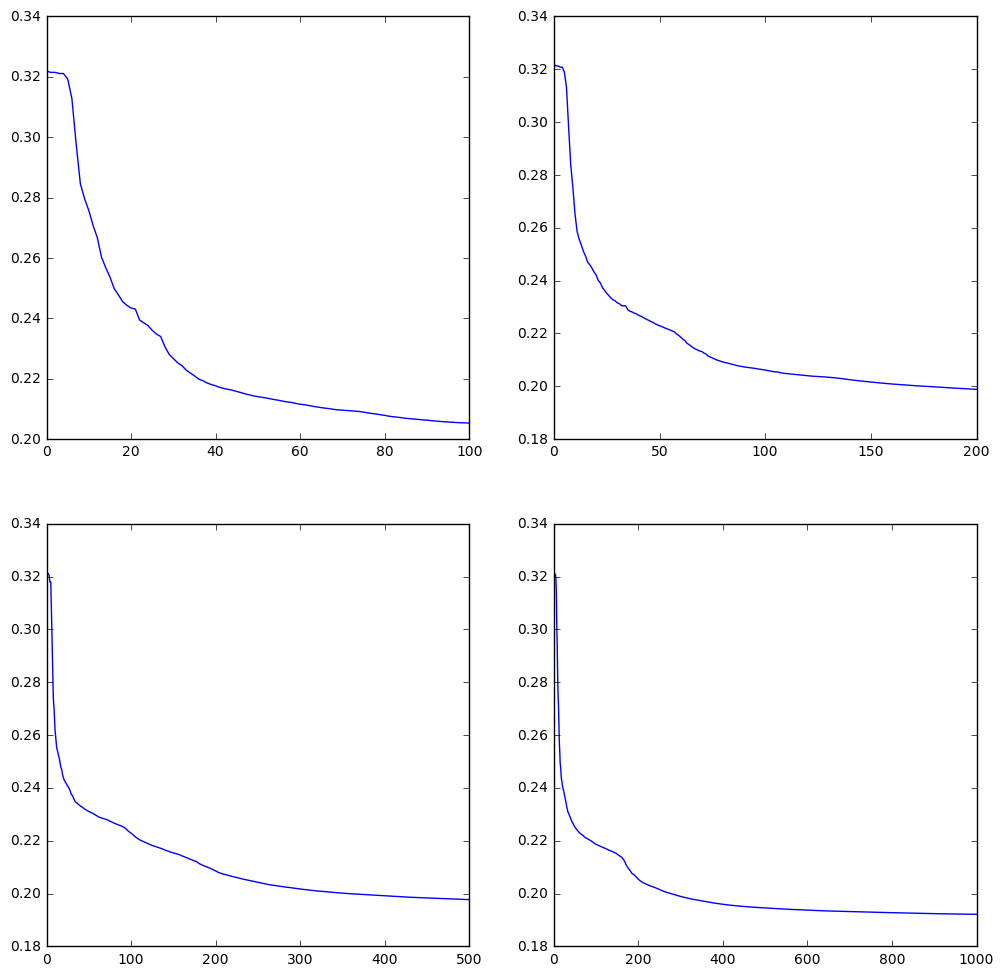

In [59]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
nnet = nn.NeuralNetworkClassifier(Xepic.shape[1], [5], len(np.unique(Tepic)))
nnet.train(Xepic, Tepic, 100)
Pred = nnet.use(Xepic)
rmse = 1-((np.sum(Pred==Tepic))/len(Tepic))
print('Iterations: 100, RMSE for Data:{}'.format(rmse))
plt.plot(nnet.getErrorTrace())

plt.subplot(2,2,2)
nnet = nn.NeuralNetworkClassifier(Xepic.shape[1], [5], len(np.unique(Tepic)))
nnet.train(Xepic, Tepic, 200)
Pred = nnet.use(Xepic)
rmse = 1-((np.sum(Pred==Tepic))/len(Tepic))
print('Iterations: 200, RMSE for Data:{}'.format(rmse))
plt.plot(nnet.getErrorTrace())

plt.subplot(2,2,3)
nnet = nn.NeuralNetworkClassifier(Xepic.shape[1], [5], len(np.unique(Tepic)))
nnet.train(Xepic, Tepic, 500)
Pred = nnet.use(Xepic)
rmse = 1-((np.sum(Pred==Tepic))/len(Tepic))
print('Iterations: 500, RMSE for Data:{}'.format(rmse))
plt.plot(nnet.getErrorTrace())

plt.subplot(2,2,4)
nnet = nn.NeuralNetworkClassifier(Xepic.shape[1], [5], len(np.unique(Tepic)))
nnet.train(Xepic, Tepic, 1000)
Pred = nnet.use(Xepic)
rmse = 1-((np.sum(Pred==Tepic))/len(Tepic))
print('Iterations: 1000, RMSE for Data:{}'.format(rmse))
plt.plot(nnet.getErrorTrace())

In [60]:
results = trainNNs(Xepic, Tepic, 0.8, [0, 5, [5, 5]], 5, 500, classify=True)

In [61]:
summarize(results)

[[0, 0.69469565217391305, 0.74608695652173918, 143.15452456474304],
 [5, 0.44808695652173913, 0.51513043478260878, 231.41136050224304],
 [[5, 5], 0.44528260869565217, 0.51182608695652176, 248.14208269119263]]

In [62]:
bestNetwork(summarize(results))

[[5, 5], 0.44528260869565217, 0.51182608695652176, 248.14208269119263]

### Test for Best Hidden Layer

In [63]:
results = trainNNs(Xepic, Tepic, 0.8, [0, [1,1],[2,2],[3,3],[4,4],[5, 5],[6,6], [7,7], [8,8], [9,9], [10, 10]], 10, 100)
print(summarize(results))
bestHiddenLayer=bestNetwork(summarize(results))[0]

[[0, 1.3841668995380976, 1.4353209747589366, 9.3985152244567871], [[1, 1], 1.2643949839214284, 1.3099357520845496, 33.616469621658325], [[2, 2], 1.0858594768844489, 1.1514303793343004, 64.965265035629272], [[3, 3], 0.99528360063770072, 1.0486109759760711, 74.987640380859375], [[4, 4], 0.97206256647485534, 1.0151218031568339, 78.649669885635376], [[5, 5], 0.95941601216626893, 1.0110496244575715, 89.242245674133301], [[6, 6], 0.94286560880907566, 0.98680145845878398, 96.942666530609131], [[7, 7], 0.93507902732014192, 0.98477764080214669, 107.86693048477173], [[8, 8], 0.92573823616567785, 0.97772870883398377, 74.004944801330566], [[9, 9], 0.9185913508764445, 0.96604328138678086, 77.610010623931885], [[10, 10], 0.91311120733839712, 0.96300284525760671, 82.002939224243164]]


In [64]:
print('Best Hidden Layer Network is:', bestHiddenLayer, 'and it will be trained using 500 Iterations')

Best Hidden Layer Network is: [10, 10] and it will be trained using 500 Iterations


In [65]:
# Data Partition
Xtrain, Ttrain, Xtest, Ttest = ml.partition(Xepic,Tepic,(0.8, 0.2), classification=True)

#Create Neural Network
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1],bestHiddenLayer,len(np.unique(Ttrain)))
           
#Train for numberIterations
nnet.train(Xtrain, Ttrain, 500, verbose=False)
            
#Testing
Ptrain = nnet.use(Xtrain)
Ptest = nnet.use(Xtest)

classes = np.unique(Ttest)
Ptrain,Prtrain,_ = nnet.use(Xtrain,allOutputs=True)
Ptest,Prtest,_ = nnet.use(Xtest,allOutputs=True)

print('Percent Correct: Training',100*np.sum(Ptrain==Ttrain)/len(Ttrain))
print()
ml.confusionMatrix(Ttrain,Ptrain,classes)
print('0-Class 1, 1-Class 2, 2-Class 3, 3-Class 4, 4-Class 5  ')
print('Percent Correct: Testing',100*np.sum(Ptest==Ttest)/len(Ttest))
print()
ml.confusionMatrix(Ttest,Ptest,classes)
print('0-Class 1, 1-Class 2, 2-Class 3, 3-Class 4, 4-Class 5  ')

Percent Correct: Training 68.8913043478

       0    1    2    3    4
    ------------------------------
 0 | 97.4  2.2  0.2  0.2  0.1   (1840 / 1840)
 1 |  3.3 49.3 40.6  0.9  6.0   (1840 / 1840)
 2 |  0.3 36.4 55.0  0.8  7.6   (1840 / 1840)
 3 |  0.2  0.8  0.5 71.4 27.2   (1840 / 1840)
 4 |  0    6.0  6.0 16.6 71.4   (1840 / 1840)
0-Class 1, 1-Class 2, 2-Class 3, 3-Class 4, 4-Class 5  
Percent Correct: Testing 56.9130434783

       0    1    2    3    4
    ------------------------------
 0 | 88.5  7.8  0.7  2.8  0.2   (460 / 460)
 1 |  5.7 40.0 39.1  3.9 11.3   (460 / 460)
 2 |  1.5 36.1 45.9  2.8 13.7   (460 / 460)
 3 |  2.0  4.6  6.5 56.5 30.4   (460 / 460)
 4 |  0.4 11.7 14.1 20.0 53.7   (460 / 460)
0-Class 1, 1-Class 2, 2-Class 3, 3-Class 4, 4-Class 5  
